In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
vacancy_list = []

def parse_salary(sal):
    if sal == None:
        return 0
    if sal["to"] == None :
        return sal["from"]
    if sal["from"] == None:
        return sal["to"]
    
    return (sal["from"] + sal["to"])/2

In [2]:
for i in range(1,11):
    req = 'https://api.hh.ru/vacancies?text="big data" or "data science" or "data analyst" or "Big Data Specialist" or "machine learning" or  "data analytics" or "data engineer" or "data scientist" or "machine learning engineer" or "машинное обучение"&only_with_salary=true&per_page=100&pages=10&period=30&currency=RUR&page=' + str(i)
    r = requests.get(req)
    parsed_string = r.json()
    for item in parsed_string["items"]:
        vacancy = {"salary":None, "area":None, "name":None, "employer":None}
        vacancy["salary"] = parse_salary( item["salary"] )
        vacancy["area"] = item["area"]["name"]
        vacancy["name"]=item["name"]
        vacancy["employer"]=item["employer"]["name"]
        vacancy_list.append(vacancy)

In [3]:
vacancy = {80:0, 120:0, 150:0, 200:0, 300:0, 310:0}

for vac in vacancy_list:
    if vac["salary"] < 80000:
        vacancy[80] = vacancy[80] + 1
        continue
    if vac["salary"] < 120000 :
        vacancy[120] = vacancy[120] + 1
        continue
    if vac["salary"] < 150000 :
        vacancy[150] = vacancy[150] + 1
        continue  
    if vac["salary"] < 200000 :
        vacancy[200] = vacancy[200] + 1
        continue
    if vac["salary"] < 300000 :
        vacancy[300] = vacancy[300] + 1
        continue
    vacancy[310] = vacancy[310] + 1

In [4]:
dict_vacancy = {}
for vac in vacancy_list:
    dict_vacancy[vac["name"]]=dict_vacancy.get(vac["name"],0)+1
tmp = dict((k,v) for k,v in dict_vacancy.items() if v>3 )

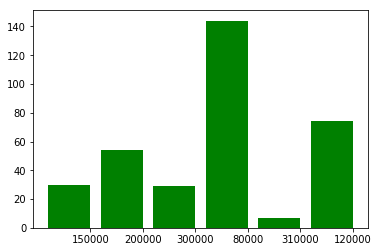

In [5]:
bins = [x*1000 for x in vacancy.keys()]
y_pos = np.arange(len(vacancy.keys()))
vals = [x for x in vacancy.values()]
plt.bar(y_pos, vals, color='green', align='edge', width=-0.8)
plt.xticks(y_pos, bins)

plt.show()

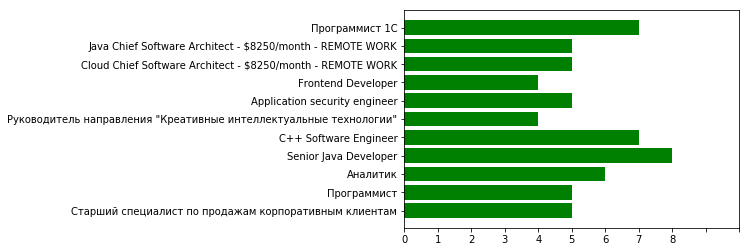

In [6]:
vals = [x for x in tmp.values()]
keys = [x for x in tmp.keys()]
y_pos = np.arange(len(vals))
plt.barh(y_pos,vals, color='green')
plt.yticks(y_pos, keys)
plt.xticks(y_pos, range(0, max(vals) + 1, 1))
plt.show()